In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], inplace=True)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

# ------------------ Pre-process Input Columns ------------------

### APPLICATION_TYPE

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

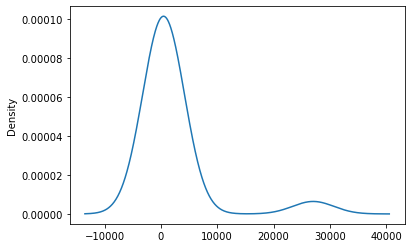

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

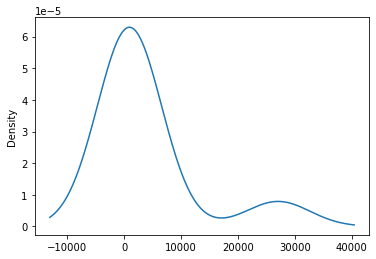

In [7]:
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_counts.plot.density()

### AFFILIATION

In [8]:
application_df['AFFILIATION'].value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

<AxesSubplot:ylabel='Density'>

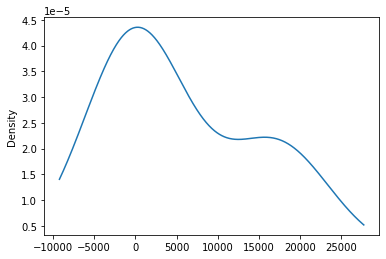

In [9]:
affiliation_counts = application_df['AFFILIATION'].value_counts()
affiliation_counts.plot.density()

### CLASSIFICATION

In [10]:
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

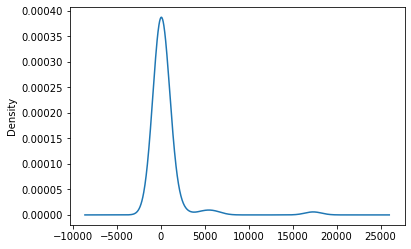

In [11]:
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

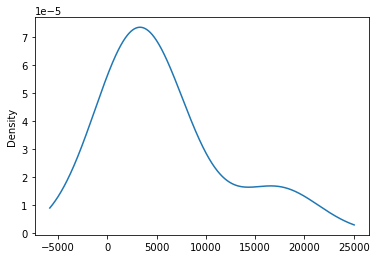

In [13]:
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts.plot.density()

### USE_CASE

In [14]:
application_df['USE_CASE'].value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

<AxesSubplot:ylabel='Density'>

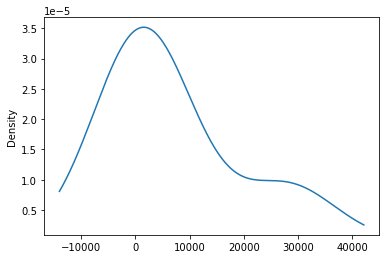

In [15]:
use_case_counts = application_df['USE_CASE'].value_counts()
use_case_counts.plot.density()

### ORGANIZATION

In [16]:
application_df['ORGANIZATION'].value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

<AxesSubplot:ylabel='Density'>

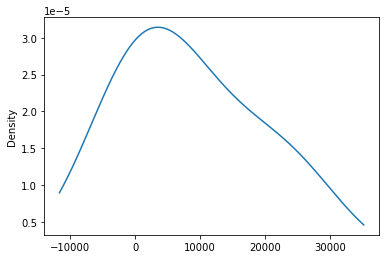

In [17]:
organization_counts = application_df['ORGANIZATION'].value_counts()
organization_counts.plot.density()

### STATUS

In [18]:
application_df['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

<AxesSubplot:ylabel='Density'>

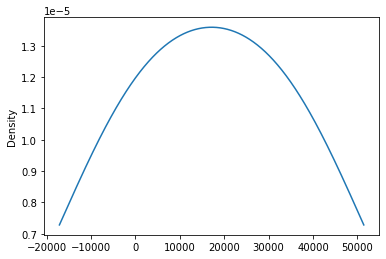

In [19]:
status_counts = application_df['STATUS'].value_counts()
status_counts.plot.density()

### INCOME_AMT

In [20]:
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

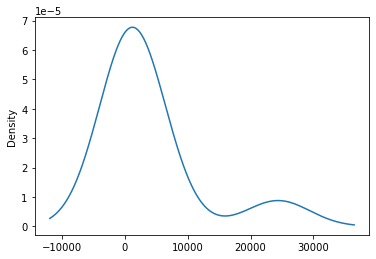

In [21]:
income_amt_counts = application_df['INCOME_AMT'].value_counts()
income_amt_counts.plot.density()

In [22]:
# Determine which values to replace if counts are less than ..?
#replace_class = list(income_amt_counts[income_amt_counts < 250].index)

# Replace in dataframe
#for cls in replace_class:
#    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(cls,"Other")
    
# Check to make sure binning was successful
#application_df.INCOME_AMT.value_counts()

In [23]:
#income_amt_counts = application_df['INCOME_AMT'].value_counts()
#income_amt_counts.plot.density()

In [24]:
application_df.drop(columns=['INCOME_AMT'], axis=1, inplace=True)

### SPECIAL_CONSIDERATIONS

In [25]:
application_df['SPECIAL_CONSIDERATIONS'].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

<AxesSubplot:ylabel='Density'>

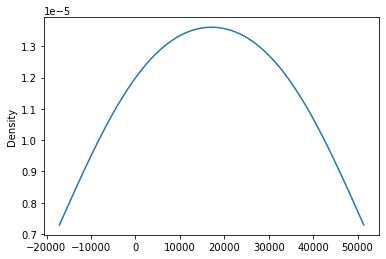

In [26]:
affiliation_counts = application_df['SPECIAL_CONSIDERATIONS'].value_counts()
affiliation_counts.plot.density()

### ASK_AMT

In [27]:
application_df['ASK_AMT'].value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

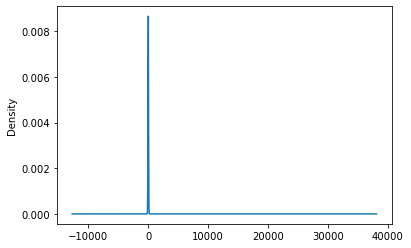

In [28]:
ask_amt_counts = application_df['ASK_AMT'].value_counts()
ask_amt_counts.plot.density()

In [29]:
#application_df.shape

In [30]:
#application_df = application_df.loc[ (application_df['ASK_AMT'] <= 5_500) , :]

In [31]:
#application_df.shape

In [32]:
#ask_amt_counts = application_df['ASK_AMT'].value_counts()
#ask_amt_counts.plot.density()

In [33]:
application_df.drop(columns=['ASK_AMT'], axis=1, inplace=True)

### IS_SUCCESSFUL

In [34]:
application_df['IS_SUCCESSFUL'].value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

<AxesSubplot:ylabel='Density'>

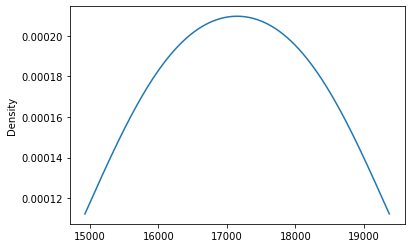

In [35]:
is_successful_counts = application_df['IS_SUCCESSFUL'].value_counts()
is_successful_counts.plot.density()

# ------------------ Encode, Scale, Split ------------------

In [36]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
SPECIAL_CONSIDERATIONS    object
IS_SUCCESSFUL              int64
dtype: object

In [37]:
# Generate our categorical variable lists
#application_cat = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION','INCOME_AMT', 'SPECIAL_CONSIDERATIONS']
application_cat = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION','SPECIAL_CONSIDERATIONS']

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
#encode_df.head()

In [38]:
# Merge one-hot encoded features and drop the originals
merged_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
merged_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [39]:
# Split our preprocessed data into our features and target arrays
y = merged_df["IS_SUCCESSFUL"].values
merged_df.drop(columns=["IS_SUCCESSFUL"], axis=1, inplace=True)
X = merged_df.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt",exist_ok=True)
checkpoint_path = "checkpoints_opt/weights_2.{epoch:02d}.hdf5"

In [46]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=120, activation="tanh", input_dim=33))
nn.add(tf.keras.layers.Dense(units=120, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=120, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=120, activation="tanh"))

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 120)               4080      
_________________________________________________________________
dense_6 (Dense)              (None, 120)               14520     
_________________________________________________________________
dense_7 (Dense)              (None, 120)               14520     
_________________________________________________________________
dense_8 (Dense)              (None, 120)               14520     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 121       
Total params: 47,761
Trainable params: 47,761
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
# Create a callback that saves the model's weights every epoch

cp_callback_opt = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Normally we use 'save_freq', but it behaves strangely, and I could not get
# it to save every 5 epochs. The 'period' param is now deprecated, but it works.
    #save_freq='epoch')

In [51]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=1000, callbacks=[cp_callback_opt])

Epoch 1/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5809 - accuracy: 0.7168
Epoch 2/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5695 - accuracy: 0.7232
Epoch 3/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5659 - accuracy: 0.7227
Epoch 4/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5638 - accuracy: 0.7248
Epoch 5/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5625 - accuracy: 0.7252

Epoch 00005: saving model to checkpoints_opt\weights_2.05.hdf5
Epoch 6/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5617 - accuracy: 0.7256
Epoch 7/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5609 - accuracy: 0.7260
Epoch 8/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5599 - accuracy: 0.7272
Epoch 9/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5603 - accuracy: 0.7264
Epoch 10/1000
804/

804/804 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7297
Epoch 72/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7303
Epoch 73/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5557 - accuracy: 0.7293
Epoch 74/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.7297
Epoch 75/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5548 - accuracy: 0.7303

Epoch 00075: saving model to checkpoints_opt\weights_2.75.hdf5
Epoch 76/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5543 - accuracy: 0.7297
Epoch 77/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5553 - accuracy: 0.7298
Epoch 78/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5549 - accuracy: 0.7290
Epoch 79/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5541 - accuracy: 0.7304
Epoch 80/1000
804/804 [

804/804 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7307
Epoch 142/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7297
Epoch 143/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5547 - accuracy: 0.7299
Epoch 144/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5550 - accuracy: 0.7297
Epoch 145/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5543 - accuracy: 0.7296

Epoch 00145: saving model to checkpoints_opt\weights_2.145.hdf5
Epoch 146/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5542 - accuracy: 0.7294
Epoch 147/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5540 - accuracy: 0.7300
Epoch 148/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5541 - accuracy: 0.7294
Epoch 149/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5540 - accuracy: 0.7298
Epoch 150/1000

804/804 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.7299

Epoch 00210: saving model to checkpoints_opt\weights_2.210.hdf5
Epoch 211/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5542 - accuracy: 0.7298
Epoch 212/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5548 - accuracy: 0.7303
Epoch 213/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5544 - accuracy: 0.7290
Epoch 214/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5543 - accuracy: 0.7301
Epoch 215/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5548 - accuracy: 0.7290

Epoch 00215: saving model to checkpoints_opt\weights_2.215.hdf5
Epoch 216/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5539 - accuracy: 0.7310
Epoch 217/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.7297
Epoch 218/1000
804/804 [=============================

804/804 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7302
Epoch 280/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7300

Epoch 00280: saving model to checkpoints_opt\weights_2.280.hdf5
Epoch 281/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7303
Epoch 282/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7293
Epoch 283/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7288
Epoch 284/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5544 - accuracy: 0.7301
Epoch 285/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7303

Epoch 00285: saving model to checkpoints_opt\weights_2.285.hdf5
Epoch 286/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7298
Epoch 287/1000
804/804 [=============================

804/804 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7306
Epoch 349/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7307
Epoch 350/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7294

Epoch 00350: saving model to checkpoints_opt\weights_2.350.hdf5
Epoch 351/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7300
Epoch 352/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7308
Epoch 353/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5542 - accuracy: 0.7306
Epoch 354/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7307
Epoch 355/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7296

Epoch 00355: saving model to checkpoints_opt\weights_2.355.hdf5
Epoch 356/1000
804/804 [=============================

804/804 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7303
Epoch 419/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5540 - accuracy: 0.7293
Epoch 420/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7303

Epoch 00420: saving model to checkpoints_opt\weights_2.420.hdf5
Epoch 421/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7298
Epoch 422/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5539 - accuracy: 0.7305
Epoch 423/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7290
Epoch 424/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7293
Epoch 425/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7305

Epoch 00425: saving model to checkpoints_opt\weights_2.425.hdf5
Epoch 426/1000
804/804 [=============================

804/804 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.7296
Epoch 488/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.7302
Epoch 489/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5540 - accuracy: 0.7308
Epoch 490/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.7303

Epoch 00490: saving model to checkpoints_opt\weights_2.490.hdf5
Epoch 491/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.7290
Epoch 492/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7296
Epoch 493/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5544 - accuracy: 0.7297
Epoch 494/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5539 - accuracy: 0.7297
Epoch 495/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7301

Epoch 00495: 

804/804 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7290
Epoch 557/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5546 - accuracy: 0.7299
Epoch 558/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7294
Epoch 559/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7307
Epoch 560/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7297

Epoch 00560: saving model to checkpoints_opt\weights_2.560.hdf5
Epoch 561/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7301
Epoch 562/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7300
Epoch 563/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7303
Epoch 564/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7308
Epoch 565/1000

804/804 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7296
Epoch 627/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7294
Epoch 628/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5541 - accuracy: 0.7304
Epoch 629/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5539 - accuracy: 0.7301
Epoch 630/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7296

Epoch 00630: saving model to checkpoints_opt\weights_2.630.hdf5
Epoch 631/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7294
Epoch 632/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7299
Epoch 633/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7293
Epoch 634/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5536 - accuracy: 0.7291
Epoch 635/1000

KeyboardInterrupt: 